* Name: Samiksha Garibe 
* Roll no. : 711
* BSC Sem 6
* NLP Assignment 2  

### Importing the Libraries and the data 

In [ ]:
import pandas as pd
import numpy as np

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download("stopwords")

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words and TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

#for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/amazon_reviews.csv')

In [ ]:
data.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,50423057,R135Q3VZ4DQN5N,B00JWXFDMG,657335467,Everbling Purple and Clear Briolette Drop Swar...,Jewelry,5,0,0,N,Y,Beauties!,so beautiful even tho clearly not high end ......,2015-08-31
1,1,US,11262325,R2N0QQ6R4T7YRY,B00W5T1H9W,26030170,925 Sterling Silver Finish 6ct Simulated Diamo...,Jewelry,5,0,0,N,N,Great product.,"Great product.. I got this set for my mother, ...",2015-08-31
2,2,US,27541121,R3N5JE5Y4T6W5M,B00M2L6KFY,697845240,"Sterling Silver Circle ""Friends Forever"" Infin...",Jewelry,5,0,0,N,Y,Exactly as pictured and my daughter's friend l...,Exactly as pictured and my daughter's friend l...,2015-08-31
3,3,US,5350721,R2I150CX5IVY9Q,B0006SW2WU,569859289,Surgical Stainless Steel Domed 9mm Fishbone Ri...,Jewelry,5,0,0,N,Y,Five Stars,Love it. Fits great. Super comfortable and nea...,2015-08-31
4,4,US,24484424,R1RM9ICOOA9MQ3,B009YPDW70,332947422,"Sterling Silver Family Pendant Necklace, 18""",Jewelry,5,0,0,N,Y,... a Mother's Day gift for my Mom and she lov...,Got this as a Mother's Day gift for my Mom and...,2015-08-31


In [ ]:
#selecting only required columns
data = data[['review_body','star_rating']]

In [ ]:
data=data.dropna()
data = data.reset_index(drop=True)
data

,review_body,star_rating
0,so beautiful even tho clearly not high end ......,5
1,"Great product.. I got this set for my mother, ...",5
2,Exactly as pictured and my daughter's friend l...,5
3,Love it. Fits great. Super comfortable and nea...,5
4,Got this as a Mother's Day gift for my Mom and...,5
...,...,...
99946,Delivery was quick. ...the beads are loose so ...,4
99947,Tiny but cute! About 1/8th of an inch wide. Th...,5
99948,So beautiful and stunning. There are cheapo p...,5
99949,The inlay is almost holographic. Very comforta...,5


In [ ]:
data['star_rating']=data['star_rating'].astype(int) # convert the star_rating column to integer
data=data[data['star_rating']!=3]
data['label']=np.where(data['star_rating']>=4,1,0) # 1-Positive, 0-Negative
data = data.reset_index(drop=True) # resetting the index

<ipython-input-21-43d521dfb417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=np.where(data['star_rating']>=4,1,0) # 1-Positive, 0-Negative


In [ ]:
data

,review_body,star_rating,label
0,so beautiful even tho clearly not high end ......,5,1
1,"Great product.. I got this set for my mother, ...",5,1
2,Exactly as pictured and my daughter's friend l...,5,1
3,Love it. Fits great. Super comfortable and nea...,5,1
4,Got this as a Mother's Day gift for my Mom and...,5,1
...,...,...,...
91437,Delivery was quick. ...the beads are loose so ...,4,1
91438,Tiny but cute! About 1/8th of an inch wide. Th...,5,1
91439,So beautiful and stunning. There are cheapo p...,5,1
91440,The inlay is almost holographic. Very comforta...,5,1


### Number of reviews by star_rating

In [ ]:
data['star_rating'].value_counts()

5    62673
4    13923
1     9334
2     5512
Name: star_rating, dtype: int64

### Preprocessing

In [ ]:
# Lower casing
data['pre_process']=data['review_body'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [ ]:
data.head()

,review_body,star_rating,label,pre_process
0,so beautiful even tho clearly not high end ......,5,1,so beautiful even tho clearly not high end ......
1,"Great product.. I got this set for my mother, ...",5,1,"great product.. i got this set for my mother, ..."
2,Exactly as pictured and my daughter's friend l...,5,1,exactly as pictured and my daughter's friend l...
3,Love it. Fits great. Super comfortable and nea...,5,1,love it. fits great. super comfortable and nea...
4,Got this as a Mother's Day gift for my Mom and...,5,1,got this as a mother's day gift for my mom and...


In [ ]:
# Remove the HTML tags and URLs from the reviews.

In [ ]:
from bs4 import BeautifulSoup
data['pre_process']=data['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
data['pre_process']=data['pre_process'].apply(lambda x: re.sub(r'http\S+','',x))

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "http://www.amazon.com/review/creata-review?ie=utf8&asin=b010xgqugs" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://www.amazon.com/review/create-review?ie=utf8&asin=b010xgqugs" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://www.amazon.com/review/review-your-purchases/ref=oh_aui_rev_shipment_o00_s00?_encoding=utf8&asins=b01444jlxe&channel=yacc-wr#" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like

In [ ]:
# Perform the Contractions on the reviews.
# Example: It won't be converted as it will not be

In [ ]:
def Contractions(s):
  s = re.sub(r"won't", "will not", s)
  s = re.sub(r"wouldn't", "would not", s)
  s = re.sub(r"couldn't", "could not", s)
  s = re.sub(r"\'d", "would", s)
  s = re.sub(r"can't", "can not", s)
  s = re.sub(r"n\'t", "not", s)
  s = re.sub(r"\'re", "are", s)
  s = re.sub(r"\'s", "is", s)
  s = re.sub(r"\'ll", "will", s)
  s = re.sub(r"\'t", "not", s)
  s = re.sub(r"\'ve", "have", s)
  s = re.sub(r"\'m", "am", s)
  s = re.sub(r"doesn't", "does not", s)
  return s
data['pre_process']=data['pre_process'].apply(lambda x:Contractions(x))

In [ ]:
data

,review_body,star_rating,label,pre_process
0,so beautiful even tho clearly not high end ......,5,1,so beautiful even tho clearly not high end ......
1,"Great product.. I got this set for my mother, ...",5,1,"great product.. i got this set for my mother, ..."
2,Exactly as pictured and my daughter's friend l...,5,1,exactly as pictured and my daughteris friend l...
3,Love it. Fits great. Super comfortable and nea...,5,1,love it. fits great. super comfortable and nea...
4,Got this as a Mother's Day gift for my Mom and...,5,1,got this as a motheris day gift for my mom and...
...,...,...,...,...
91437,Delivery was quick. ...the beads are loose so ...,4,1,delivery was quick. ...the beads are loose so ...
91438,Tiny but cute! About 1/8th of an inch wide. Th...,5,1,tiny but cute! about 1/8th of an inch wide. th...
91439,So beautiful and stunning. There are cheapo p...,5,1,so beautiful and stunning. there are cheapo pi...
91440,The inlay is almost holographic. Very comforta...,5,1,the inlay is almost holographic. very comforta...


In [ ]:
# Remove stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [ ]:
data.head()

,review_body,star_rating,label,pre_process
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end ... super ...
1,"Great product.. I got this set for my mother, ...",5,1,"great product.. got set mother, allergic bijou..."
2,Exactly as pictured and my daughter's friend l...,5,1,exactly pictured daughteris friend loved it! c...
3,Love it. Fits great. Super comfortable and nea...,5,1,love it. fits great. super comfortable neat id...
4,Got this as a Mother's Day gift for my Mom and...,5,1,got motheris day gift mom loved it! really nic...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Lemmatization
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
data.head()

,review_body,star_rating,label,pre_process
0,so beautiful even tho clearly not high end ......,5,1,beautiful even tho clearly high end ... super ...
1,"Great product.. I got this set for my mother, ...",5,1,"great product .. got set mother , allergic bij..."
2,Exactly as pictured and my daughter's friend l...,5,1,exactly pictured daughteris friend loved it ! ...
3,Love it. Fits great. Super comfortable and nea...,5,1,love it . fit great . super comfortable neat i...
4,Got this as a Mother's Day gift for my Mom and...,5,1,got motheris day gift mom loved it ! really ni...


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['pre_process'], data['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (68581,) (68581,) Test:  ((22861,), (22861,))


In [ ]:
# Feature Extraction
# TF-IDF Vectorizer


In [ ]:
print("TFIDF Vectorizer......")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer......


In [ ]:
tf_x_train

<68581x18799 sparse matrix of type '<class 'numpy.float64'>'
	with 772158 stored elements in Compressed Sparse Row format>

In [ ]:
tf_x_test

<22861x18799 sparse matrix of type '<class 'numpy.float64'>'
	with 256518 stored elements in Compressed Sparse Row format>

### Running ML algorithms 

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')

lr_tfidf.fit(tf_x_train, Y_train)  

#Predict y value for test dataset
y_predict = lr_tfidf.predict(tf_x_test)

y_prob = lr_tfidf.predict_proba(tf_x_test)[:,1]

print(classification_report(Y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(Y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      3737
           1       0.96      0.98      0.97     19124

    accuracy                           0.95     22861
   macro avg       0.91      0.88      0.90     22861
weighted avg       0.94      0.95      0.94     22861

Confusion Matrix: [[ 2964   773]
 [  472 18652]]
AUC: 0.9735723106644203


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()

nb_tfidf.fit(tf_x_train, Y_train)  

#Predict y value for test dataset

y_predict = nb_tfidf.predict(tf_x_test)

y_prob = nb_tfidf.predict_proba(tf_x_test)[:,1]

print(classification_report(Y_test,y_predict))

print('Confusion Matrix:',confusion_matrix(Y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

              precision    recall  f1-score   support

           0       0.97      0.35      0.52      3737
           1       0.89      1.00      0.94     19124

    accuracy                           0.89     22861
   macro avg       0.93      0.68      0.73     22861
weighted avg       0.90      0.89      0.87     22861

Confusion Matrix: [[ 1316  2421]
 [   37 19087]]
AUC: 0.9656455773307027


In [ ]:
####Using SVM Algorithm
from sklearn.svm import LinearSVC
clf=LinearSVC(random_state=0)

In [ ]:
####Fitting the Training data into model
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [ ]:
####Predicting the Test Data
y_test_pred=clf.predict(tf_x_test)

In [ ]:
#Analyzing the results
from sklearn.metrics import classification_report
report=classification_report(Y_test,y_test_pred,output_dict=True)

In [ ]:
report

{'0': {'precision': 0.856396866840731,
  'recall': 0.78993845330479,
  'f1-score': 0.8218262806236081,
  'support': 3737},
 '1': {'precision': 0.9595652621819306,
  'recall': 0.9741162936624137,
  'f1-score': 0.9667860293736054,
  'support': 19124},
 'accuracy': 0.9440094484055815,
 'macro avg': {'precision': 0.9079810645113309,
  'recall': 0.8820273734836018,
  'f1-score': 0.8943061549986067,
  'support': 22861},
 'weighted avg': {'precision': 0.9427007202375685,
  'recall': 0.9440094484055815,
  'f1-score': 0.9430900151538101,
  'support': 22861}}

### Wordcloud 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from string import punctuation
punct = list(punctuation)

from nltk.stem import PorterStemmer
ps = PorterStemmer()

import re

from nltk.corpus import wordnet

from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image 
from wordcloud import WordCloud ,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt


In [ ]:
text = " ".join(review for review in data.pre_process)
print("There are {} words in the combination of all review.".format(len(text)))

There are 7915186 words in the combination of all review.


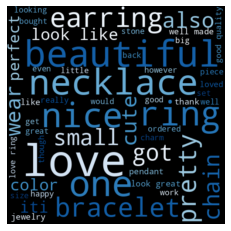

In [ ]:
wordcloud = WordCloud(max_font_size =100 , width = 500, height = 500, max_words = 50, stopwords = stop_words, colormap="Blues").generate(text) #max -> the font of the biggest word 
plt.figure()
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Text Clustering 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
vectorizer = TfidfVectorizer(stop_words = "english")
X = vectorizer.fit_transform(data.pre_process)

In [ ]:
#if the data is large data preprocessing and cleaning is essential

###Feature Extraction

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '000000',
 '000g',
 '005',
 '00g',
 '00ga',
 '00gs',
 '00is',
 '00mm',
 '01',
 '0156',
 '01c',
 '02',
 '024mm',
 '026',
 '028',
 '03',
 '04',
 '044',
 '05',
 '058',
 '06',
 '066',
 '07',
 '075',
 '08',
 '09',
 '09pcs',
 '0g',
 '0ga',
 '0is',
 '0nly',
 '10',
 '100',
 '1000',
 '10000',
 '10000x',
 '100is',
 '100mph',
 '100x',
 '101',
 '101st',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '109lbs',
 '10am',
 '10cttw',
 '10dd9f793b3a8e18791c6134095287ab',
 '10g',
 '10gauge',
 '10in',
 '10k',
 '10kt',
 '10ky',
 '10m',
 '10min',
 '10mm',
 '10only',
 '10p',
 '10pcs',
 '10pts',
 '10th',
 '10times',
 '10x',
 '10xs',
 '10yr',
 '11',
 '110',
 '1106',
 '111',
 '115',
 '115lbs',
 '116',
 '117',
 '11am',
 '11cm',
 '11l2',
 '11mm',
 '11ring',
 '11th',
 '11y',
 '11yo',
 '11yrs',
 '12',
 '120',
 '1200',
 '1200sized',
 '124',
 '125',
 '126',
 '128',
 '129',
 '12g',
 '12hrs',
 '12in',
 '12k',
 '12mm',
 '12oz',
 '12th',
 '12yo',
 '12yr',
 '13',
 '130',
 '132',
 '135',
 '135g',

In [ ]:
X.getrow(0).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
true_k=3
model = KMeans(n_clusters=true_k, init='k-means++',max_iter=100 ,n_init =1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
print("Top terms per clusters:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
  print("Cluster %d:" %i),
  for ind in order_centroids[i, :20]:
    print('%s' % terms[ind]),
  print

print("\n")
print("Prediction")

Top terms per clusters:
Cluster 0:
nice
great
love
ring
look
good
pretty
like
quality
perfect
price
cute
wear
itis
loved
earring
beautiful
really
size
necklace
Cluster 1:
love
ring
wife
earring
great
bracelet
daughter
pretty
absolutely
necklace
nice
perfect
cute
husband
thank
look
quality
color
compliment
product
Cluster 2:
beautiful
love
ring
absolutely
earring
necklace
itis
piece
great
bracelet
quality
look
expected
perfect
price
loved
wear
thank
picture
exactly


Prediction


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
order_centroids

array([[12994,  8835, 11644, ...,  1309, 14698,   754],
       [11644, 16092, 20831, ..., 14194, 14195,     0],
       [ 2523, 11644, 16092, ..., 14169, 14170,     0]])

In [ ]:
#profiling of clusters i.e naming of clusters with their meaningful names

In [ ]:
print("Top terms per clusters:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
  print("Cluster %d:" %i),
  for ind in order_centroids[i, :5]:
    print('%s' % terms[ind]),
  print

print("\n")
print("Prediction")

Top terms per clusters:
Cluster 0:
nice
great
love
ring
look
Cluster 1:
love
ring
wife
earring
great
Cluster 2:
beautiful
love
ring
absolutely
earring


Prediction


### Renaming the cluster:

In [ ]:
cluster_names = ["complements", "marriage", "love"]

for i in range(true_k):
    print("Cluster %d (%s):" % (i, cluster_names[i]))
    for ind in order_centroids[i, :5]:
        print('%s' % terms[ind])
    print()

Cluster 0 (complements):
nice
great
love
ring
look

Cluster 1 (marriage):
love
ring
wife
earring
great

Cluster 2 (love):
beautiful
love
ring
absolutely
earring

